In [1]:
import sys
import os.path
import pylab as plt
from zedstat import zedstat 
import pandas as pd
plt.style.use('fivethirtyeight')

In [27]:
#
# order is order of spline used for smoothing
# alpha is significance level
# prevalence is prevalence of positive class
# 
zt=zedstat.processRoc(df=pd.read_csv('examples_data/roc2.csv'),
           order=3, 
           total_samples=100000,
           positive_samples=100,
           alpha=0.01,
           prevalence=.002)

In [28]:
# compute smoothened roc and other performance measures
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

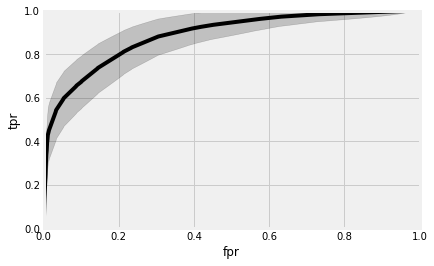

In [29]:
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax,color='k')
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

(0.0, 1.0)

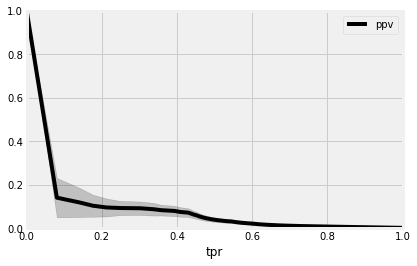

In [30]:
ax=plt.gca()
ax=zt.get().plot(ax=ax,x='tpr',y='ppv',color='k')
plt.fill_between(x=zt.get()['tpr'], y1=zt.df_lim['U'].ppv,y2=zt.df_lim['L'].ppv, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

In [31]:
# compute auc with confidence bounds
zt.auc(alpha=.05)

(0.8875903790087464, 0.9349670453101371, 0.8402137127073557)

In [32]:
# required sample size
zt.samplesize(delta_auc=.05)

264.79526815762136

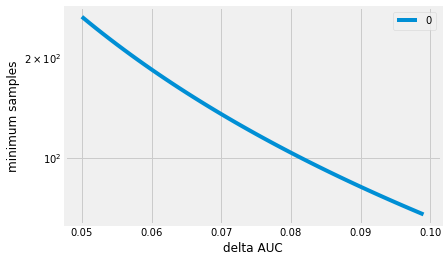

In [33]:
import numpy as np
pd.DataFrame(np.array([zt.samplesize(delta_auc=a) 
                       for a in np.arange(.05,.1,.001)]),
             np.arange(.05,.1,.001)).plot(logy=True)
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('minimum samples');

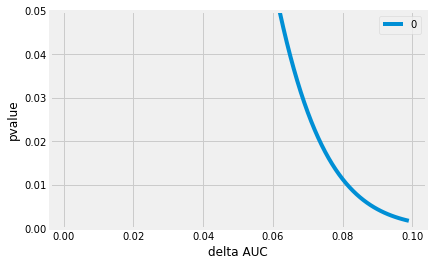

In [34]:
pd.DataFrame([zt.pvalue(delta_auc=a) for a in np.arange(0.001,.1,.001)],
             np.arange(0.001,.1,.001)).plot()
plt.gca().set_ylim(0,0.05)   
#plt.gca().set_xlim(0.0196,0.035)   
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('pvalue');

In [35]:
zt.operating_zone(LRminus=.65)
rf0,txt0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=10)
rf1,txt1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=10)
display(zt._operating_zone)
print('high precision operation:\n','\n '.join(txt0))
print('\n')
print('high recall operation:\n','\n '.join(txt1))

,fpr,tpr,ppv,acc,npv,LR+,LR-,threshold
high precision,0.008,0.358115,0.083467,0.990732,0.998705,44.764334,0.647062,0.234186
high sensitivity,0.061,0.611204,0.019675,0.938344,0.999171,10.019732,0.414054,0.032108


high precision operation:
 For every 10 positive instances
 we raise 85 flags,
 out of which 5 are true positives
 80 are false alarms
 5 cases are missed


high recall operation:
 For every 10 positive instances
 we raise 147 flags,
 out of which 6 are true positives
 142 are false alarms
 4 cases are missed


In [36]:
#pd.options.display.html.use_mathjax = False
from zedstat.textable import tablewithbounds
xf=tablewithbounds(zt.get(),zt.usample(zt.df_lim['U']),zt.usample(zt.df_lim['L']))#.to_csv('table.csv')
xf.loc[zt._operating_zone.fpr.values]

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.008,$0.358 \pm 0.093$,$0.083 \pm 0.018$,$0.990 \pm 0.000$,$0.998 \pm 0.000$,$44.76 \pm 11.74$,$0.647 \pm 0.094$,0.234186
0.061,$0.611 \pm 0.095$,$0.019 \pm 0.003$,$0.938 \pm 0.000$,$0.999 \pm 0.000$,$10.01 \pm 1.566$,$0.414 \pm 0.101$,0.032108


In [26]:
from zedstat.textable import textable
textable(xf,tabname='tmp.tex',FORMAT='%1.3f',INDEX=True,LNTERM='\\\\\\hline\n')     

# Second example: From raw samples

In [38]:
pf=pd.read_csv('./examples_data/id_predictions_M_2.csv',index_col=0)
pf

,pfsa_score,target,seq_score,pscore_score,rare_score,age_at_screening,predicted_risk,surgery_target_gap,RCRI_risk,fips
patient_id,,,,,,,,,,
P27273512701,0.003104,1,0.006088,0.003201,0.004751,66.980769,0.004362,2,0.039,48000
P29607128901,0.004028,1,0.016018,0.004410,0.004670,76.211538,0.020247,0,0.060,8000
P00702899701,0.003680,1,0.013655,0.003689,0.003735,67.769231,0.010662,0,0.060,36000
P00740374101,0.004483,1,0.007008,0.003862,0.007148,62.961538,0.007581,1,0.039,42000
P02559276601,0.003792,1,0.006803,0.004377,0.004036,74.211538,0.011139,0,0.060,4000
...,...,...,...,...,...,...,...,...,...,...
P00502780802,0.002666,0,0.003108,0.003924,0.004036,63.980769,0.003197,-414,0.039,26000
P00542466302,0.002666,0,0.002989,0.003983,0.003969,40.153846,0.003163,-267,0.039,13000
P01463512601,0.002666,0,0.003144,0.004064,0.009094,45.038462,0.003293,-521,0.039,26000


In [104]:
def genroc(df,
           risk='predicted_risk',
           target='target',
           steps=1000,
           TARGET=[1],
           outfile=None):
    '''
    compute roc curve from raw observation of risk-target information on samples
    '''
    threshold={}
    df_=df[[risk,target]].rename(columns={risk:'risk',target:'target'})
    delta=(df_.risk.max()-df_.risk.min())/steps
    for r in np.arange(df_.risk.min(),df_.risk.max()+delta,delta):
        #print(r)
        fn=df_[(df_.risk<r) & df_.target.isin(TARGET)].index.size
        tp=df_[(df_.risk>=r) & df_.target.isin(TARGET)].index.size
        fp=df_[(df_.risk>=r) & ~df_.target.isin(TARGET)].index.size
        tn=df_[(df_.risk<r) & ~df_.target.isin(TARGET)].index.size
        threshold[r]={'tp':tp,'fp':fp,'tn':tn,'fn':fn}
        
    xf=pd.DataFrame.from_dict(threshold).transpose()
    xf.index.name='threshold'
    
    xf=xf.assign(tpr=(xf.tp)/(xf.tp+xf.fn)).assign(fpr=(xf.fp)/(xf.fp+xf.tn))
    xf=xf[['fpr','tpr']].reset_index()#.set_index('fpr')
    
    if outfile is not None:
        xf.to_csv(outfile)
    return xf,df_.index.size,df_[df_.target.isin(TARGET)].index.size

In [105]:
rf,total_samples,positive_samples=genroc(pf)

<AxesSubplot:xlabel='fpr'>

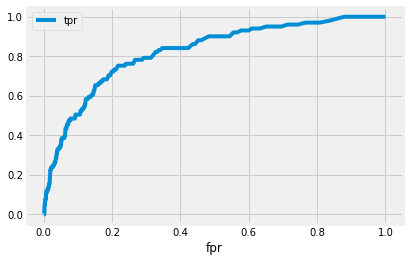

In [106]:
rf.plot(x='fpr',y='tpr')

In [108]:
zt1=zedstat.processRoc(df=rf,
           order=3, 
           total_samples=total_samples,
           positive_samples=positive_samples,
           alpha=0.05,
           prevalence=.002)

(0.8316266643792399, 0.8851536617170326, 0.7781131160065163)


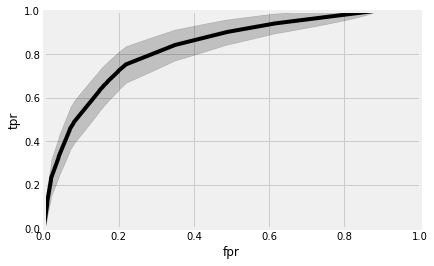

In [112]:
zt1.smooth(STEP=0.001)
zt1.allmeasures(interpolate=True)
zt1.usample(precision=3)
zt1.getBounds()
ax=plt.gca()
ax=zt1.get().tpr.plot(ax=ax,color='k')
plt.fill_between(x=zt1.get().index, y1=zt1.df_lim['U'].tpr,y2=zt1.df_lim['L'].tpr, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');
print(zt1.auc(alpha=.05))

In [113]:
zt1.samplesize(delta_auc=.1)

53.78954905673166